<a href="https://colab.research.google.com/github/an33k25/Music-Genre-Classification-Project/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:















from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files


uploaded = files.upload()


In [ ]:
import os
Root = "/content/drive/My Drive/Colab Notebooks/AI-ML PROJECT"
os.chdir(Root)

In [ ]:
audio_dataset_path='/content/drive/MyDrive/Colab Notebooks/AI-ML PROJECT/Data/genres_original'
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI-ML PROJECT/Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
# IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import os
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display  # this library is mainly use to deal with sound datset (audio)
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# INSTALLING THE LIBRARIES
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install librosa

In [ ]:
def features_extractor(file):
      audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
      mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
      mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

      return mfccs_scaled_features

In [ ]:
metadata.drop(labels=552, axis=0, inplace=True)

In [ ]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        final_class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))
        data=features_extractor(file_name)
        extracted_features.append([data, final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

553it [03:34,  3.17it/s]<ipython-input-27-a2cfbf48bd37>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
554it [03:35,  2.28it/s]

Error: 


999it [06:24,  2.60it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame (extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [ ]:
X=np.array (extracted_features_df ['feature'].tolist())
y=np.array(extracted_features_df ['class'].tolist())

In [ ]:
X.shape

(998, 40)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing  import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical (labelencoder.fit_transform(y))

In [ ]:
y.shape

(998, 10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.04723763e+02,  8.77537155e+01, -3.32488594e+01, ...,
        -2.38248801e+00, -1.36347139e+00, -7.22123563e-01],
       [-2.59909851e+02,  1.23193169e+02, -6.39508581e+00, ...,
        -6.73697710e+00, -3.90829515e+00,  3.18117642e+00],
       [-1.15755066e+02,  6.70791245e+01,  1.88346851e+00, ...,
        -3.43661404e+00, -1.73870683e+00, -4.68738191e-02],
       ...,
       [-1.25020428e+01,  9.13173676e+01, -2.30759563e+01, ...,
        -4.04763937e+00, -1.77685583e+00, -1.75431299e+00],
       [-2.37930984e+01,  8.29835587e+01,  2.32049227e+00, ...,
         1.40550292e+00,  4.16220367e-01, -3.45980115e-02],
       [-9.63196945e+01,  9.09497147e+01, -3.22195396e+01, ...,
        -2.41483903e+00, -1.62698299e-01, -1.84749973e+00]], dtype=float32)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 40)
(200, 40)
(798, 10)
(200, 10)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels=y.shape[1]

In [ ]:
model=Sequential()
model.add(Dense (1024, input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense (32, activation="relu"))
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1024)              41984     
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)              

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5', verbose=1, save_best_only=True)
start=datetime.now()
history=model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration=datetime.now() - start
print("Training completed in time:", duration)

Epoch 1/100
23/25 [==========================>...] - ETA: 0s - loss: 0.7900 - accuracy: 0.7364
Epoch 1: val_loss improved from inf to 1.77780, saving model to saved_models/audio_classification_17:41:23.hdf5
25/25 [==============================] - 1s 58ms/step - loss: 0.7827 - accuracy: 0.7393 - val_loss: 1.7778 - val_accuracy: 0.5650
Epoch 2/100
24/25 [===========================>..] - ETA: 0s - loss: 0.8141 - accuracy: 0.7383
Epoch 2: val_loss did not improve from 1.77780
25/25 [==============================] - 1s 26ms/step - loss: 0.8076 - accuracy: 0.7406 - val_loss: 1.7911 - val_accuracy: 0.5900
Epoch 3/100
24/25 [===========================>..] - ETA: 0s - loss: 0.7090 - accuracy: 0.7708
Epoch 3: val_loss did not improve from 1.77780
25/25 [==============================] - 1s 29ms/step - loss: 0.7118 - accuracy: 0.7694 - val_loss: 1.8378 - val_accuracy: 0.5800
Epoch 4/100
24/25 [===========================>..] - ETA: 0s - loss: 0.6306 - accuracy: 0.7904
Epoch 4: val_loss did no

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[3.430067539215088, 0.6000000238418579]

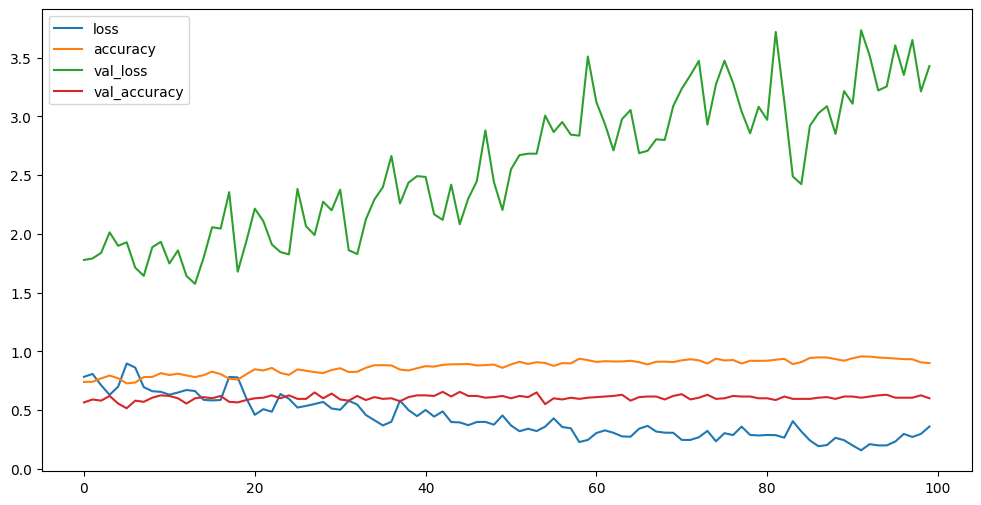

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [ ]:
np.argmax(model.predict(X), axis=-1)

32/32 [==============================] - 1s 7ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 4, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 7, 5, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 1, 2, 9, 2, 9, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3,

In [ ]:
filename="/content/drive/MyDrive/Colab Notebooks/AI-ML PROJECT/Data/genres_original/classical/classical.00003.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features))
print(predicted_label)
predicted_label = np.array([predicted_label])  # Reshape to a 1D array
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-3.26897430e+02  1.27400604e+02 -3.05961761e+01  3.74713974e+01
 -5.29617548e+00  2.08135643e+01 -1.77868533e+00 -4.61545658e+00
 -4.04019880e+00  5.24227428e+00 -6.42448783e-01  2.79456735e+00
  7.22920656e+00  3.97069526e+00 -2.39217043e+00  1.48818469e+00
  5.89341402e-01 -5.93018532e-01  2.34307027e+00  2.63825250e+00
  4.55192041e+00 -3.03187817e-01 -1.59056199e+00  1.71130866e-01
  1.19197810e+00 -3.59523967e-02  2.08741593e+00  3.54622483e-01
  1.03717148e+00 -2.67570233e+00 -6.66255951e+00 -2.44702744e+00
  2.09354901e+00  2.43527636e-01  1.39810920e-01  1.45328581e+00
 -2.91861296e+00 -3.13705468e+00  4.90082932e+00 -4.18077499e-01]
[[-3.26897430e+02  1.27400604e+02 -3.05961761e+01  3.74713974e+01
  -5.29617548e+00  2.08135643e+01 -1.77868533e+00 -4.61545658e+00
  -4.04019880e+00  5.24227428e+00 -6.42448783e-01  2.79456735e+00
   7.22920656e+00  3.97069526e+00 -2.39217043e+00  1.48818469e+00
   5.89341402e-01 -5.93018532e-01  2.34307027e+00  2.63825250e+00
   4.55192041e+00 -

array(['classical'], dtype='<U9')